In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from optims.anneal import Annealer

np.random.seed(42)

In [2]:
class Fun(Annealer):
  def __init__(self, initial_state):
    super().__init__(initial_state)
    self.states = [initial_state]

  def move(self):
    self.state = np.random.uniform(0, 5)
  
  def energy(self):
    x = self.state
    return np.cos(x**2) + x/5 + 1

In [3]:
def create_sim(initial_state, k=3, save_fig=None):
  f = Fun(initial_state)
  f.steps = 100_000
  f.Tmin = 1/k
  f.Tmax = 1/k

  f.anneal(save_states=True)

  plt.hist(f.states, density=True, bins=200, label="SA histogram")

  # sns.kdeplot(f.states, label="SA PDF")

  f = lambda x : np.cos(x**2) + x/5 + 1

  integral = quad(lambda x : np.exp(-k*f(x)), 0, 5)[0]
  m_k = lambda x : np.exp(-k*f(x)) / integral

  x = np.linspace(0, 5, 500)
  plt.plot(x, f(x), label="$f$")
  plt.plot(x, m_k(x), label="$m^{(k)}$")

  plt.xlim(0, 5)
  plt.legend()
  plt.title(f"k = {k}")

  if save_fig != None:
    plt.savefig(save_fig, dpi=300, bbox_inches="tight")

  plt.show()


In [4]:
initial_state = np.random.uniform(0, 5)

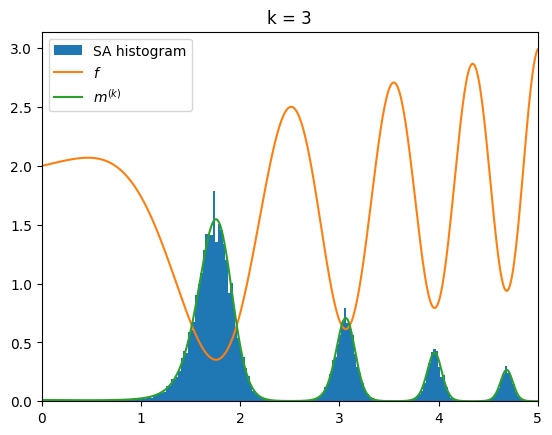

In [5]:
create_sim(initial_state, k=3, save_fig="figures/simulated_annealing_NMD_3.svg")

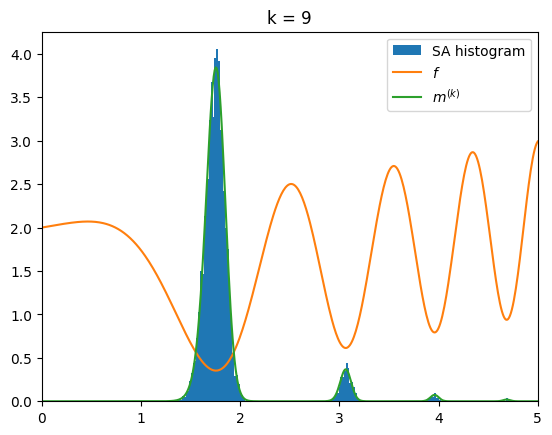

In [6]:
create_sim(initial_state, k=9, save_fig="figures/simulated_annealing_NMD_9.svg")

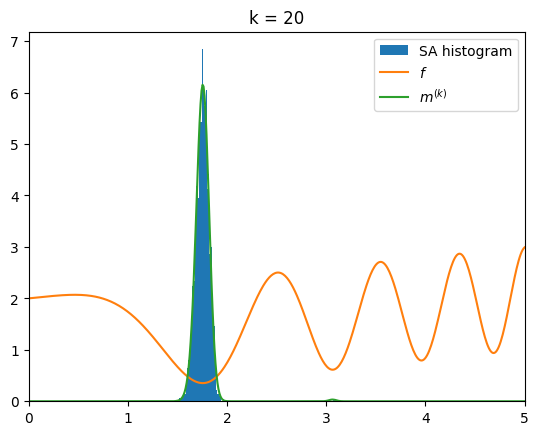

In [7]:
create_sim(initial_state, k=20)


In [8]:
""" tmins = np.linspace(2, 1e-5, 100)

for tmin in tmins:
  create_sim(tmin, initial_state) """

' tmins = np.linspace(2, 1e-5, 100)\n\nfor tmin in tmins:\n  create_sim(tmin, initial_state) '